<a href="https://colab.research.google.com/github/Sachikethan/Sachikethan_INFO5731_Fall2024/blob/main/Guntha_Sachikethan_Assignement_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from **scratch instead of using any pre-existing libraries** to do so:

(1) Count the frequency of all the N-grams (N=3) and (N=2).

(2) Calculate the probabilities for all the bigrams in the dataset by using the formula  count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative
probabilities of each review in terms of other reviews (abstracts, or tweets) by using the formula  frequency (noun phrase) / max frequency (noun phrase) on the whole dataset.

Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
from scipy.spatial.distance import cosine
import re
from collections import Counter, defaultdict
import math


In [ ]:
df = pd.read_csv('/content/semantic_scholar_abstracts_cleaned (1).csv')
df.head(5)

,paperId,title,abstract,year,clean_abstract
0,5c1e3ac8ffff1ec3eb5b263d5693626c40b360ad,Proceedings of the Seventeenth International C...,NaN,2000.0,NaN
1,d94adeaa180eb03027285b52bcbb7160197f43ab,Proceedings of the Seventeenth International C...,NaN,2000.0,NaN
2,870b913a7ce15f270e02104bc8d587754f31dfc5,Postprocessing in machine learning and data mi...,This article surveys the contents of the works...,2000.0,article survey content workshop postprocessing...
3,192df23fadf96eb656e80827cf7a2495fc1f9837,Anomaly detection using visualization and mach...,Unauthorized access from inside or outside an ...,2000.0,unauthorized access inside outside organizatio...
4,e701eee2b8f1c5ab8003ca6bbb3bc5dbd02e7df1,Predicting class libraries interface evolution...,Managing the evolution of an OO system constit...,2000.0,managing evolution oo system constitutes compl...


In [ ]:
df = df.drop_duplicates()
df = df.dropna()
print(df['clean_abstract'].head(5))

2    article survey content workshop postprocessing...
3    unauthorized access inside outside organizatio...
4    managing evolution oo system constitutes compl...
5    keywords learning note idiaprr reference epfla...
6    technical paper building chineseenglish mappin...
Name: clean_abstract, dtype: object


In [ ]:
print(df['clean_abstract'].head(5))

0                                                  NaN
1                                                  NaN
2    article survey content workshop postprocessing...
3    unauthorized access inside outside organizatio...
4    managing evolution oo system constitutes compl...
Name: clean_abstract, dtype: object


In [ ]:
import pandas as pd



df = df['clean_abstract'].drop_duplicates()

# Function to count n-grams in a given text
def ngram_counter(ngram_list):
    ngram_count_dict = {}
    for ngram in ngram_list:
        ngram_count_dict[ngram] = ngram_count_dict.get(ngram, 0) + 1
    return ngram_count_dict

# Function to extract n-grams from text
def extract_ngrams(text, n):
    if not isinstance(text, str) or len(text.split()) < n:
        return []
    words = text.split()
    return [' '.join(words[i:i+n]) for i in range(len(words) - n + 1)]

# Initialize lists to store results
abstracts = []
bigram_results = []
trigram_results = []

# Iterate over each abstract in the dataset
for abstract in df:
    bigrams = extract_ngrams(abstract, 2)
    trigrams = extract_ngrams(abstract, 3)

    bigram_counts = ngram_counter(bigrams)
    trigram_counts = ngram_counter(trigrams)

    abstracts.append(abstract)
    bigram_results.append(bigram_counts)
    trigram_results.append(trigram_counts)

# Store results in a structured list
structured_results = []
for index, abstract_text in enumerate(abstracts):
    structured_results.append({
        'abstract_text': abstract_text,
        'bigram_counts': bigram_results[index],
        'trigram_counts': trigram_results[index]
    })

# Print the first 100 results
for result in structured_results[:100]:
    print(f"Abstract: {result['abstract_text']}")
    print(f"Bigram Counts: {result['bigram_counts']}")
    print(f"Trigram Counts: {result['trigram_counts']}")
    print('=' * 140)


Abstract: nan
Bigram Counts: {}
Trigram Counts: {}
Abstract: article survey content workshop postprocessing machine learning data mining interpretation visualization integration related topic within kdd sixth acm sigkdd international conference knowledge discovery data mining boston usa august corresponding web site wwwacmorgsigkddkdd first survey paper introduces state art workshop topic emphasizing postprocessing form significant component knowledge discovery database kdd next article brings report content analysis discussion aspect regarding workshop afterwards survey workshop paper found downloaded wwwcasmcmastercabruhakddkddrephtml author report worked organizer workshop programme committee formed additional three research field
Bigram Counts: {'article survey': 1, 'survey content': 1, 'content workshop': 1, 'workshop postprocessing': 1, 'postprocessing machine': 1, 'machine learning': 1, 'learning data': 1, 'data mining': 2, 'mining interpretation': 1, 'interpretation visualizati

In [ ]:
import pandas as pd

# Function to extract n-grams from text
def getting_ngrams_fun(text, n):
    words = text.split() if isinstance(text, str) else []
    return [' '.join(words[i:i+n]) for i in range(len(words) - n + 1)] if len(words) >= n else []

# Function to count bigrams and unigrams in the dataset
def counting_ngrams_unigrams_fun(dataframe):
    bi_counts, uni_counts = {}, {}

    for text in dataframe:
        big = getting_ngrams_fun(text, 2)

        for b in big:
            bi_counts[b] = bi_counts.get(b, 0) + 1
            for word in b.split():
                uni_counts[word] = uni_counts[word] + 1 if word in uni_counts else 1

    return bi_counts, uni_counts

# Compute bigram and unigram counts
bi_counts, uni_counts = counting_ngrams_unigrams_fun(df)

# Compute bigram probabilities
big_prob = {b: (bi_counts[b] / uni_counts.get(b.split()[0], 1)) for b in bi_counts}

# Store results
resultinglist = []

for text in df:
    big = getting_ngrams_fun(text, 2)
    big_prob_list = [
        f"'{b}' (Probability: {big_prob[b]:.4f})" if b in big_prob else f"'{b}' (Probability: Undefined)"
        for b in big
    ]

    resultinglist.append({"big_text": text, "bigram_probabilities": ", ".join(big_prob_list)})

# Convert results to DataFrame
df_results = pd.DataFrame(resultinglist)

# Print first 100 results using enumerate and different formatting
for idx, res in enumerate(df_results.head(100).itertuples(), start=1):
    print(f"Entry {idx}:")
    print(f"Big Text: {res.big_text}")
    print(f"Bigrams and Probabilities: {res.bigram_probabilities}")
    print('-' * 140)


big_text: nan
Bigrams and Probabilities: 
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
big_text: article survey content workshop postprocessing machine learning data mining interpretation visualization integration related topic within kdd sixth acm sigkdd international conference knowledge discovery data mining boston usa august corresponding web site wwwacmorgsigkddkdd first survey paper introduces state art workshop topic emphasizing postprocessing form significant component knowledge discovery database kdd next article brings report content analysis discussion aspect regarding workshop afterwards survey workshop paper found downloaded wwwcasmcmastercabruhakddkddrephtml author report worked organizer workshop programme committee formed additional three research field
Bigrams and Probabilities: 'article survey' (Probability: 0.0006), 'survey content' (Probability: 0.0012), 'content workshop

In [ ]:
import re
import pandas as pd
from collections import Counter

# Function to tokenize text into words
def text_tokenizer(txt):
    return re.findall(r'\b\w+\b', txt.lower()) if isinstance(txt, str) else []

# Function to extract noun-like phrases from text
def noun_phrase_extractor(txt):
    words = text_tokenizer(txt)
    noun_like_phrases = []
    current_phrase = []

    for word in words:
        if word.endswith(('s', 'n', 'e')):  # Identifying noun-like words
            current_phrase.append(word)
        else:
            if current_phrase:
                noun_like_phrases.append(' '.join(current_phrase))
                current_phrase = []

    if current_phrase:  # Add last collected phrase
        noun_like_phrases.append(' '.join(current_phrase))

    return noun_like_phrases

# Function to count noun-like phrase occurrences
def noun_phrase_counter(dataframe):
    phrase_freq = Counter()

    for txt in dataframe:
        phrases = noun_phrase_extractor(txt)
        for phrase in phrases:
            phrase_freq[phrase] += 1  # Updating counter directly

    return phrase_freq

# Function to calculate relative probabilities of noun-like phrases
def relative_probability_calc(dataframe):
    total_phrase_counts = noun_phrase_counter(dataframe)

    max_count = max(total_phrase_counts.values()) if total_phrase_counts else 1  # Avoid division by zero

    results_collection = []

    for txt in dataframe:
        phrases = noun_phrase_extractor(txt)
        doc_phrase_counts = Counter(phrases)

        rel_prob = {phrase: freq / max_count for phrase, freq in doc_phrase_counts.items()}

        results_collection.append({"big_data": txt, "rel_probs": rel_prob})

    return pd.DataFrame(results_collection)

# Compute results
df_results = relative_probability_calc(df)

# Print the first 100 results using a different loop structure
for idx, res in enumerate(df_results.head(100).itertuples(index=False), start=1):
    print(f"Entry {idx}:")
    print(f"Big Data: {res.big_data}")
    print(f"Relative Probabilities: {res.rel_probs}")
    print('||' * 100)


Entry 1:
Big Data: nan
Relative Probabilities: {}
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
Entry 2:
Big Data: article survey content workshop postprocessing machine learning data mining interpretation visualization integration related topic within kdd sixth acm sigkdd international conference knowledge discovery data mining boston usa august corresponding web site wwwacmorgsigkddkdd first survey paper introduces state art workshop topic emphasizing postprocessing form significant component knowledge discovery database kdd next article brings report content analysis discussion aspect regarding workshop afterwards survey workshop paper found downloaded wwwcasmcmastercabruhakddkddrephtml author report worked organizer workshop programme committee formed additional three research field
Relative Probabilities: {'article': 0.000156494

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any **pre-existing libraries** to do so.

In [ ]:
df = pd.read_csv('/content/semantic_scholar_abstracts_cleaned (1).csv')
df.head(5)

,paperId,title,abstract,year,clean_abstract
0,5c1e3ac8ffff1ec3eb5b263d5693626c40b360ad,Proceedings of the Seventeenth International C...,NaN,2000.0,NaN
1,d94adeaa180eb03027285b52bcbb7160197f43ab,Proceedings of the Seventeenth International C...,NaN,2000.0,NaN
2,870b913a7ce15f270e02104bc8d587754f31dfc5,Postprocessing in machine learning and data mi...,This article surveys the contents of the works...,2000.0,article survey content workshop postprocessing...
3,192df23fadf96eb656e80827cf7a2495fc1f9837,Anomaly detection using visualization and mach...,Unauthorized access from inside or outside an ...,2000.0,unauthorized access inside outside organizatio...
4,e701eee2b8f1c5ab8003ca6bbb3bc5dbd02e7df1,Predicting class libraries interface evolution...,Managing the evolution of an OO system constit...,2000.0,managing evolution oo system constitutes compl...


In [ ]:
df = pd.read_csv("/content/semantic_scholar_abstracts_cleaned (1).csv")

In [ ]:
import re
import math
import pandas as pd
from collections import defaultdict


# Tokenization and TF calculation
corpus = df['clean_abstract'].tolist()
tf_matrix = []
doc_index = 0

while doc_index < len(corpus):
    doc = corpus[doc_index]
    words = re.findall(r'\b\w+\b', doc.lower())
    word_count = len(words)
    tf_dict = defaultdict(float)
    word_index = 0

    while word_index < word_count:
        word = words[word_index]
        tf_dict[word] += 1
        word_index += 1

    for word in tf_dict:
        tf_dict[word] /= word_count

    tf_matrix.append(tf_dict)
    doc_index += 1

# IDF calculation
N = len(corpus)
idf_dict = defaultdict(float)
doc_count = defaultdict(int)
doc_index = 0

while doc_index < N:
    doc = corpus[doc_index]
    unique_words = set(re.findall(r'\b\w+\b', doc.lower()))
    for word in unique_words:
        doc_count[word] += 1
    doc_index += 1

for word, count in doc_count.items():
    idf_dict[word] = math.log(N / count) + 1

# TF-IDF calculation
tfidf_matrix = []
doc_index = 0

while doc_index < len(tf_matrix):
    tf_dict = tf_matrix[doc_index]
    tfidf_doc = {}
    for word, tf_value in tf_dict.items():
        idf_value = idf_dict.get(word, 0)
        tfidf_doc[word] = tf_value * idf_value
    tfidf_matrix.append(tfidf_doc)
    doc_index += 1

# Display TF-IDF values
doc_index = 0

while doc_index < len(tfidf_matrix):
    doc_tfidf = tfidf_matrix[doc_index]
    print(f"Document {doc_index + 1}:")
    for word, tfidf_value in sorted(doc_tfidf.items(), key=lambda item: item[1], reverse=True):
        print(f"  {word}: {tfidf_value:.4f}")
    print()
    doc_index += 1


Streaming output truncated to the last 5000 lines.
  truven: 0.0603
  marketscan: 0.0540
  supplied: 0.0507
  ordinary: 0.0507
  substance: 0.0503
  differing: 0.0496
  incentive: 0.0469
  predictive: 0.0468
  alongside: 0.0465
  crossvalidated: 0.0440
  percent: 0.0399
  well: 0.0391
  implementing: 0.0378
  nonparametric: 0.0377
  mental: 0.0376
  separate: 0.0363
  disorder: 0.0359
  seven: 0.0357
  weighted: 0.0347
  demographic: 0.0346
  principal: 0.0344
  hierarchical: 0.0340
  implement: 0.0335
  unique: 0.0333
  square: 0.0329
  respect: 0.0329
  learning: 0.0322
  top: 0.0321
  ratio: 0.0317
  performance: 0.0313
  commonly: 0.0311
  relative: 0.0307
  generally: 0.0296
  suggest: 0.0296
  efficiency: 0.0296
  explore: 0.0294
  based: 0.0293
  metric: 0.0293
  collection: 0.0292
  benefit: 0.0292
  ensemble: 0.0292
  least: 0.0285
  software: 0.0279
  r: 0.0276
  called: 0.0273
  predictor: 0.0271
  improved: 0.0268
  source: 0.0264
  condition: 0.0263
  single: 0.0261
  eval

In [ ]:
df.columns

Index(['paperId', 'title', 'abstract', 'year', 'clean_abstract'], dtype='object')

In [ ]:
import pandas as pd
import math
from collections import Counter, defaultdict



# Preprocessing: Drop rows where 'clean_abstract' is NaN
df = df.dropna(subset=['clean_abstract'])

# Ensure 'clean_abstract' is of type string
df['clean_abstract'] = df['clean_abstract'].astype(str)

# Convert 'clean_abstract' column to a list of documents
text_collection = df['clean_abstract'].tolist()

# Calculate Term Frequency (TF)
tf_matrix = []
doc_index = 0
while doc_index < len(text_collection):
    doc = text_collection[doc_index]
    words = doc.split()
    word_count = Counter(words)
    total_words = len(words) if len(words) > 0 else 1  # Avoid division by zero
    tf_dict = {}
    word_index = 0
    unique_words = list(word_count.keys())
    while word_index < len(unique_words):
        word = unique_words[word_index]
        tf_dict[word] = word_count[word] / total_words
        word_index += 1
    tf_matrix.append(tf_dict)
    doc_index += 1

# Calculate Inverse Document Frequency (IDF)
total_docs = len(text_collection)
idf_scores = defaultdict(int)
doc_index = 0
while doc_index < total_docs:
    doc = text_collection[doc_index]
    unique_words = set(doc.split())
    word_index = 0
    unique_words_list = list(unique_words)
    while word_index < len(unique_words_list):
        word = unique_words_list[word_index]
        idf_scores[word] += 1
        word_index += 1
    doc_index += 1

for word in idf_scores:
    idf_scores[word] = math.log((total_docs + 1) / (idf_scores[word] + 1)) + 1

# Compute TF-IDF Matrix
tfidf_matrix = []
doc_index = 0
while doc_index < len(tf_matrix):
    tf_dict = tf_matrix[doc_index]
    tfidf_doc = {}
    word_index = 0
    tf_words = list(tf_dict.keys())
    while word_index < len(tf_words):
        word = tf_words[word_index]
        tfidf_doc[word] = tf_dict[word] * idf_scores.get(word, 0)
        word_index += 1
    tfidf_matrix.append(tfidf_doc)
    doc_index += 1

# Function to compute cosine similarity
def calc_cosine_similarity(vec_a, vec_b):
    common_words = set(vec_a.keys()).union(set(vec_b.keys()))
    dot_prod = sum(vec_a.get(w, 0) * vec_b.get(w, 0) for w in common_words)
    magnitude_a = math.sqrt(sum(v**2 for v in vec_a.values()))
    magnitude_b = math.sqrt(sum(v**2 for v in vec_b.values()))
    return dot_prod / (magnitude_a * magnitude_b) if magnitude_a and magnitude_b else 0.0

# Calculate TF-IDF for the query
search_query = "machine learning techniques for anomaly detection and cybersecurity"
query_words = search_query.split()
query_word_count = Counter(query_words)
total_query_words = len(query_words) if len(query_words) > 0 else 1
query_tf = {}
word_index = 0
unique_query_words = list(query_word_count.keys())
while word_index < len(unique_query_words):
    word = unique_query_words[word_index]
    query_tf[word] = query_word_count[word] / total_query_words
    word_index += 1
query_tfidf = {word: query_tf[word] * idf_scores.get(word, 0) for word in query_tf}

# Rank documents based on similarity
doc_similarity_scores = []
doc_index = 0
while doc_index < len(tfidf_matrix):
    similarity = calc_cosine_similarity(query_tfidf, tfidf_matrix[doc_index])
    doc_similarity_scores.append((doc_index, similarity))
    doc_index += 1

# Sort documents by similarity in descending order
doc_similarity_scores.sort(key=lambda x: x[1], reverse=True)

# Display the top 5 ranked documents
print("\nTop 5 Ranked Documents:")
rank = 0
while rank < 5 and rank < len(doc_similarity_scores):
    index, similarity = doc_similarity_scores[rank]
    print(f"Rank {rank + 1}: Document {index + 1} - Similarity: {similarity:.4f}")
    print(f"Abstract: {df.iloc[index]['clean_abstract']}\n")
    print('||' * 50)
    rank += 1



Top 5 Ranked Documents:
Rank 1: Document 72 - Similarity: 0.4803
Abstract: anomaly detection used decade identify extract anomalous component data many technique used detect anomaly one increasingly significant technique machine learning ml play important role area research paper conduct systematic literature review slr analyzes ml model detect anomaly application review analyzes model four perspective application anomaly detection ml technique performance metric ml model classification anomaly detection review identified research article written discus ml technique anomaly detection analyzing selected research article present different application anomaly detection found selected research article moreover identify distinct ml model used identification anomaly finally present different datasets applied experiment anomaly detection well many general datasets addition observe unsupervised anomaly detection adopted researcher classification anomaly detection system detection anomaly usin

In [ ]:
# Define a custom query
custom_search_query = "machine learning techniques for detecting cyber threats and anomaly detection in network security"

# Function to rank documents based on similarity to a given query
def rank_documents_similarity(query_text, data_frame):
    doc_collection = data_frame['clean_abstract'].tolist()
    tfidf_data, idf_scores = generate_tfidf_matrix(doc_collection)
    query_tfidf = tfidf_query_calc(query_text, idf_scores)

    ranked_similarity = [(doc_idx, calc_cosine_similarity(query_tfidf, doc_tfidf)) for doc_idx, doc_tfidf in enumerate(tfidf_data)]
    ranked_similarity.sort(key=lambda x: x[1], reverse=True)

    return ranked_similarity

# Rank documents using the optimized ranking function
ranked_documents = rank_documents_similarity(custom_search_query, df)

# Store top ranked documents
top_matched_docs = []

for i in range(5):
    doc_idx, similarity_score = ranked_documents[i]
    top_matched_docs.append({
        "Rank": i + 1,
        "Doc_Index": doc_idx,
        "Similarity_Score": similarity_score,
        "Text_Abstract": df.iloc[doc_idx]['clean_abstract']
    })

# Display the top 5 ranked documents
print("\nTop 5 Matched Documents for Custom Query:")
for item in top_matched_docs:
    print(f"Rank {item['Rank']}: Document {item['Doc_Index']+1} - Similarity: {item['Similarity_Score']:.4f}")
    print(f"Abstract: {item['Text_Abstract']}\n")
    print('||' * 50)



Top 5 Matched Documents for Custom Query:
Rank 1: Document 92 - Similarity: 0.3391
Abstract: anomaly detection used decade identify extract anomalous component data many technique used detect anomaly one increasingly significant technique machine learning ml play important role area research paper conduct systematic literature review slr analyzes ml model detect anomaly application review analyzes model four perspective application anomaly detection ml technique performance metric ml model classification anomaly detection review identified research article written discus ml technique anomaly detection analyzing selected research article present different application anomaly detection found selected research article moreover identify distinct ml model used identification anomaly finally present different datasets applied experiment anomaly detection well many general datasets addition observe unsupervised anomaly detection adopted researcher classification anomaly detection system dete

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit or Fine tune bert model).

(2) Visualize the word embedding model you created. (PCA and T-sne)

(3) Calculate the cosine similarity between a few pairs of words to see if the model captures semantic similarity accurately.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [ ]:
# Define a custom stopword list (common English stopwords)
custom_stopwords = set([
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours",
    "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers",
    "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves",
    "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are",
    "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does",
    "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until",
    "while", "of", "at", "by", "for", "with", "about", "against", "between", "into",
    "through", "during", "before", "after", "above", "below", "to", "from", "up", "down",
    "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here",
    "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more",
    "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so",
    "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"
])

# Function to preprocess text
def preprocess(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters and numbers
    tokens = text.split()  # Tokenize by splitting on spaces
    tokens = [word for word in tokens if word not in custom_stopwords and len(word) > 1]  # Remove stopwords and short words
    return tokens

# Apply preprocessing to 'clean_abstract' column
df['tokens'] = df['clean_abstract'].apply(preprocess)

# Display the first few rows of the processed data
df[['clean_abstract', 'tokens']].head()


,clean_abstract,tokens
0,nan,[nan]
1,nan,[nan]
2,article survey content workshop postprocessing...,"[article, survey, content, workshop, postproce..."
3,unauthorized access inside outside organizatio...,"[unauthorized, access, inside, outside, organi..."
4,managing evolution oo system constitutes compl...,"[managing, evolution, oo, system, constitutes,..."


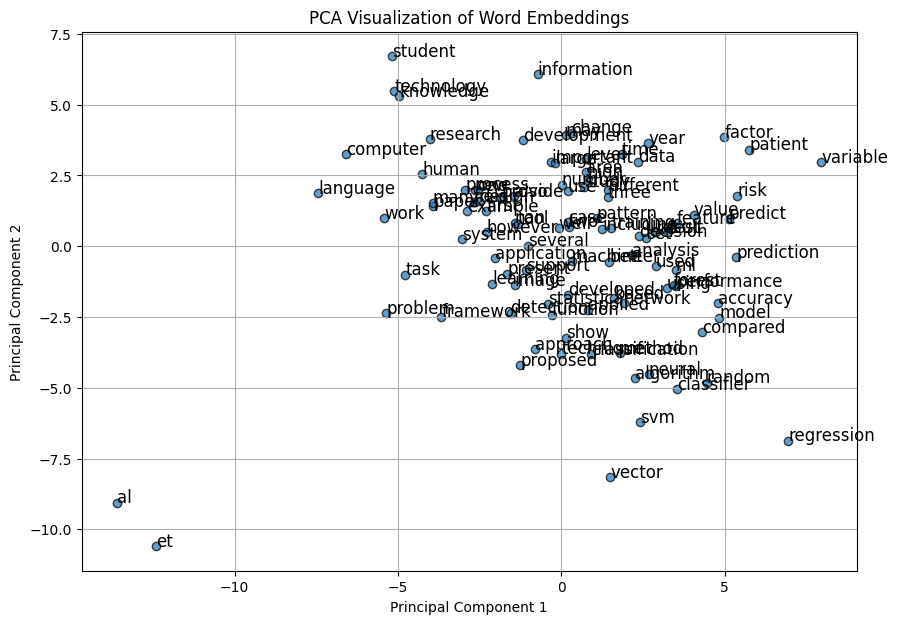

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from gensim.models import Word2Vec

# Train the Word2Vec model
embedding_model = Word2Vec(sentences=df['tokens'], vector_size=300, window=5, min_count=2, workers=4, sg=0)
embedding_vectors = embedding_model.wv

# Select the first 100 words for visualization
selected_words = list(embedding_vectors.index_to_key)[:100]
selected_vectors = np.array([embedding_vectors[word] for word in selected_words])

# Perform PCA to reduce dimensions to 2
pca_transformer = PCA(n_components=2)
transformed_vectors = pca_transformer.fit_transform(selected_vectors)

# Plotting the PCA results
plt.figure(figsize=(10, 7))
plt.scatter(transformed_vectors[:, 0], transformed_vectors[:, 1], edgecolors='k', alpha=0.7)
for idx in range(len(selected_words)):
    plt.text(transformed_vectors[idx, 0], transformed_vectors[idx, 1], selected_words[idx], fontsize=12)
plt.title("PCA Visualization of Word Embeddings")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


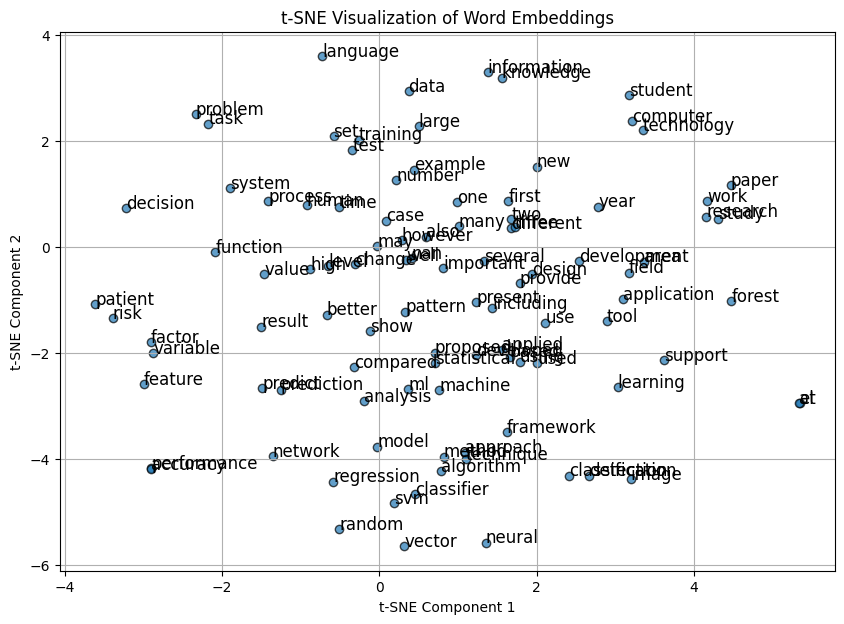

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from gensim.models import Word2Vec

# Assuming 'df' is your DataFrame and 'tokens' is the column with tokenized text data
# Train the Word2Vec model
embedding_model = Word2Vec(sentences=df['tokens'], vector_size=300, window=5, min_count=2, workers=4, sg=0)
embedding_vectors = embedding_model.wv

# Select the first 100 words for visualization
selected_words = list(embedding_vectors.index_to_key)[:100]
selected_vectors = np.array([embedding_vectors[word] for word in selected_words])

# Perform t-SNE to reduce dimensions to 2
tsne_transformer = TSNE(n_components=2, perplexity=30, random_state=42)
transformed_vectors = tsne_transformer.fit_transform(selected_vectors)

# Plotting the t-SNE results
plt.figure(figsize=(10, 7))
plt.scatter(transformed_vectors[:, 0], transformed_vectors[:, 1], edgecolors='k', alpha=0.7)
for idx, word in enumerate(selected_words):
    plt.text(transformed_vectors[idx, 0], transformed_vectors[idx, 1], word, fontsize=12)
plt.title("t-SNE Visualization of Word Embeddings")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid(True)
plt.show()


In [ ]:
from scipy.spatial.distance import cosine

# Function to calculate cosine similarity between two word vectors
def calculate_cosine_similarity(term1, term2):
    vector1 = word_vectors[term1]
    vector2 = word_vectors[term2]
    return 1 - cosine(vector1, vector2)

# List of word pairs to compare
word_comparisons = [
    ('learning', 'model'),
    ('learning', 'machine'),
    ('learning', 'data'),
    ('learning', 'method'),
    ('learning', 'algorithm'),
    ('learning', 'using'),
    ('learning', 'study'),
    ('learning', 'result'),
    ('learning', 'system'),
    ('learning', 'used')
]

# Iterate over each word pair and compute cosine similarity
for pair in word_comparisons:
    term1, term2 = pair
    if all(term in word_vectors for term in pair):
        similarity_score = calculate_cosine_similarity(term1, term2)
        print(f"Cosine Similarity between '{term1}' and '{term2}': {similarity_score:.4f}")
    else:
        missing_terms = [term for term in pair if term not in word_vectors]
        print(f"Vocabulary missing: {', '.join(missing_terms)}")


Cosine Similarity between 'learning' and 'model': 0.3573
Cosine Similarity between 'learning' and 'machine': 0.0560
Cosine Similarity between 'learning' and 'data': 0.1767
Cosine Similarity between 'learning' and 'method': 0.4528
Cosine Similarity between 'learning' and 'algorithm': 0.4674
Cosine Similarity between 'learning' and 'using': 0.2771
Cosine Similarity between 'learning' and 'study': 0.3045
Cosine Similarity between 'learning' and 'result': 0.1132
Cosine Similarity between 'learning' and 'system': 0.2123
Cosine Similarity between 'learning' and 'used': 0.3560


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.




1.   Which NLP Task you would like perform on your selected dataset
(NER, Summarization, Sentiment Analysis, Text classficication)
2.  Explain your labeling Schema you have used and mention those labels

3.  You can take AI assistance for labeling the data only.



I have used the coding for the analyze the data to get more constarint for enhancing the labelling, extartacted dataset has the more postive enad nuetral review with conating of rating of 5/5 reviews

In [ ]:
df_tweets = pd.read_csv("/content/cleaned_tweets.csv") #orginal dataset of amazon prodcut review
df_tweets.head()

,tweet_id,username,text,clean_text
0,1892437596678029752,DrJoeCIO,AI: Reshaping the Future of Teaching?\n#AIinEd...,AI: Reshaping the Future of Teaching? AIinEduc...
1,1892437416994111938,99_juls,RT @Ronald_vanLoon: This 14.8 ft anime-style t...,RT : This 14.8 ft anime-style transformer robo...
2,1892437280264016077,KritikalTalk,KritiKal helps businesses to revolutionize app...,KritiKal helps businesses to revolutionize app...
3,1892437088320008519,AIyaiyai_Info,Want to sound like an AI expert at your next d...,Want to sound like an AI expert at your next d...
4,1892437071937061292,N3tWork99__,"If your account is Hacked, or your Account bei...","If your account is Hacked, or your Account bei..."


In [ ]:
# Define AI and Machine Learning-based sentiment-related words

positive_words_ai_ml = {
    "efficient", "accurate", "innovative", "breakthrough", "optimization", "enhancement",
    "improvement", "automated", "transformative", "intelligent", "adaptive", "reliable",
    "advancement", "scalable", "state-of-the-art", "reinforcement", "deep learning",
    "neural networks", "predictive", "enhanced", "groundbreaking", "autonomous", "superior"
}

negative_words_ai_ml = {
    "bias", "error", "misclassification", "overfitting", "underfitting", "computationally expensive",
    "limited", "failure", "challenge", "brittle", "vulnerable", "misleading", "flawed",
    "inaccurate", "problematic", "complicated", "inefficient", "expensive", "restricted",
    "unscalable", "data leakage", "unreliable", "lacking", "faulty", "infeasible"
}

neutral_words_ai_ml = {
    "algorithm", "model", "dataset", "training", "testing", "parameter", "feature",
    "layer", "activation", "loss function", "gradient", "epoch", "hyperparameter",
    "architecture", "network", "learning rate", "performance", "classification", "prediction"
}

# Function to determine sentiment based on AI & ML-related keyword matching
def determine_sentiment_ai_ml(text):
    words = set(text.lower().split())  # Convert text to lowercase and split into words

    if any(word in words for word in positive_words_ai_ml):
        return "Positive"
    elif any(word in words for word in negative_words_ai_ml):
        return "Negative"
    elif any(word in words for word in neutral_words_ai_ml):
        return "Neutral"
    else:
        return "Neutral"  # Default to Neutral if no match is found

# Apply AI/ML-specific sentiment analysis to the dataset
df_tweets['sentiment_ai_ml'] = df_tweets['clean_text'].apply(determine_sentiment_ai_ml)

# Select necessary columns for the final dataset
df_sentiment_ai_ml = df_tweets[['tweet_id', 'clean_text', 'sentiment_ai_ml']].rename(columns={'tweet_id': 'document_id'})

# Save the dataset as a CSV file
sentiment_ai_ml_file_path = "tweets_sentiment_analysis_ai_ml.csv"
df_sentiment_ai_ml.to_csv(sentiment_ai_ml_file_path, index=False)

# Display the first few rows of the updated dataset
print("\nAI/ML-Based Sentiment Analysis Dataset Preview:")
print(df_sentiment_ai_ml.head())




AI/ML-Based Sentiment Analysis Dataset Preview:
           document_id                                         clean_text  \
0  1892437596678029752  AI: Reshaping the Future of Teaching? AIinEduc...   
1  1892437416994111938  RT : This 14.8 ft anime-style transformer robo...   
2  1892437280264016077  KritiKal helps businesses to revolutionize app...   
3  1892437088320008519  Want to sound like an AI expert at your next d...   
4  1892437071937061292  If your account is Hacked, or your Account bei...   

  sentiment_ai_ml  
0         Neutral  
1         Neutral  
2         Neutral  
3         Neutral  
4         Neutral  


# Mandatory Question

Provide your thoughts on the assignment by filling this survey link. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

in this assignment i faced some isssues as i have limited knowledge on labelling the data as i oly dealt with labeled data previously choosing terms to label stuff and stop words to choose these it took me lot of time.But still i managed to got my asignment done and leraned new techniques.